<a href="https://colab.research.google.com/github/mbahlin/MAT421/blob/main/MAT421HWG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21.1 Numerical Integration Problem Statement 


Function f(x):

Take integral over total interval [a,b].

Numerical grid consists of n+1 points with spacing h = (b - a)/n.

Each point x on the grid equals x_i, where x_0 = a , and x_n = b

The subinterval is [x_i, x_iplus1]

Numerical Integration = ∫[a,b] f(x)dx 

# 21.2 Riemann's Integral

Width of Rectangle = x_iplus1 - x_1 = h 
Height of Rectangle = defined by function value f(x)
Riemann Integral Approximation:

∫[a,b] f(x)dx = ∑[n-1, i=0] h f(x_i) = ∑[n, i=1] hf(x_i)

(Sum Equations depend on if left or right endpoint is chosen to measure height)

Taylor Series Substitution:

∫[x_i,x_iplus1] f(x)dx = ∫[x_i,x_iplus1] (f(x_i) + f'(x_i)(x - x_i) + ...)dx = hf(x_i) + O(h^2)

Riemann integral approximation over a single integral is O(h^2)

h = (b - a)/n

Total Error: O(h) = ((b - a)/n) * O(h^2) = the overall accuracy.

Midpoint Rule:

Takes the rectangular height of the rectangle at each subinterval to be the midpoint between x_i and x_iplus1 or y = (x_iplus1 + x_i)/2

∫[a,b] f(x)dx = ∑[n, i=1] h f(y_i) 

Using Taylor Series Substitution: 

∫[x_i,x_iplus1] f(x)dx = hf(y_i) + O(h^3)


In [ ]:
import numpy as np 
a = 0 
b = np.pi
n = 10
h = (b - a)/(n - 1)
x = np.linspace(a,b,n)
f = np.cos(x)

I_rl = h * sum(f[:n-1])
err_rl = 0 - I_rl

I_rr = h * sum(f[1:])
err_rr = 0 - I_rr

I_mid = h * sum(np.cos((x[:n-1] + x[1:]) / 2 ))
err_mid = 0 - I_mid

print(I_rl)
print(err_rl)

print(I_rr)
print(err_rr)

print(I_mid)
print(err_mid)


0.34906585039886606
-0.34906585039886606
-0.3490658503988656
0.3490658503988656
1.5501637768927252e-16
-1.5501637768927252e-16


# 21.3 Trapezoid Rule


Trapezoid Rule:

Fits a trapezoid into each subinterval and sums the areas of the trapezoid to approximate the total integral.

∫[a,b] f(x)dx = ∑[n-1, i=0] h (f(x_i) + f(x_iplus1))/2

Expansion of Trapezoid Rule:

∑[n-1, i=0] h (f(x_i) + f(x_iplus1))/2 = (h/2)[(f(x_0) + f(x_1)) + (f(x_1) + f(x_2)) + ... + (f(x_nminus1) + f(x_n))]

Using Taylor Series Substitution:

∫[x_i,x_iplus1] f(x)dx = h((f(x_i) + f(x_iplus1))/2) + O(h^3)

Trapezoid rule approximation integral over subinterval = h(f(x_iplus1) + f(x_i))

O(h^3) for single subinterval, O(h^2) for whole integral 



In [ ]:
import numpy as np

a = 0 
b = np.pi
n = 11
h = (b - a)/(n - 1)
x = np.linspace(a,b,n)
f = np.cos(x)

I_trap = (h/2)*(f[0] + 2*sum(f[1:n-1]) + f[n-1])
err_trap = 0 - I_trap

print(I_trap)
print(err_trap)


2.092721098805179e-16
-2.092721098805179e-16


# 21.4 Simpson's Rule

Simpson's Rule - Approximates the area under f(x) over subintervals [x_iminus1, x_i] and [x_i,x_iplus1] by fitting a quadratic polynomial throught he points (x_iminus1, f(x_iminus1)),(x_i, f(x_i)) and (x_iplus1, f(x_iplus1)) which is a unique polynomial, then integrating that quadratic exactly.

Final Version:

∫[x_i,x_iplus1] f(x)dx = (h/3)((f(x_iplus1) + 4*f(x_i) + f(x_iplus1)) + O(h^5)

In [ ]:
import numpy as np

a = 0 
b = np.pi
n = 11
h = (b - a)/(n - 1)
x = np.linspace( a, b, n)
f = np.sin(x)
I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:]) + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

# 21.5 Computing Integrals in Python

The scipy.integrate sub packages has several functions for computing integrals. The trapz takes input argument an array of function values f computed on a numerical grid x.

In [6]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a)/(n - 1)
x = np.linspace(a , b, n)
f = np.sin(x)
I_trapz = trapz(f , x)
I_trap = (h/2)*(f[0] + 2*sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


Use the cumtrapz function cumsum to find the approximated cumulative integral 

F(X) = ∫[x_0, X] f(x)dx

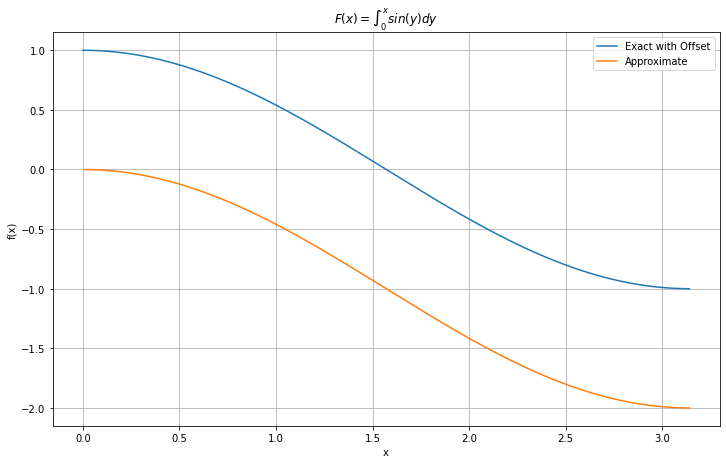

In [5]:
from scipy.integrate import cumtrapz
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = np.arange(0, np.pi, 0.01)
F_exact =  np.cos(x)
F_approx = cumtrapz( - np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approximate'])
plt.show()

The quad(f, a, b) function uses a different numerical differentiation scheme to approximate integrals. quad integrates the function defined by the function object, f, from a to b 



In [ ]:
from scipy.integrate import quad

I_quad, est_err_quad = quad(np.sin, 0, np.pi)
err_quad = 2 - I_quad

print(I_quad)
print(err_quad)